In [2]:
import matplotlib.pyplot as plt
import re
import os
import numpy as np
import pandas as pd

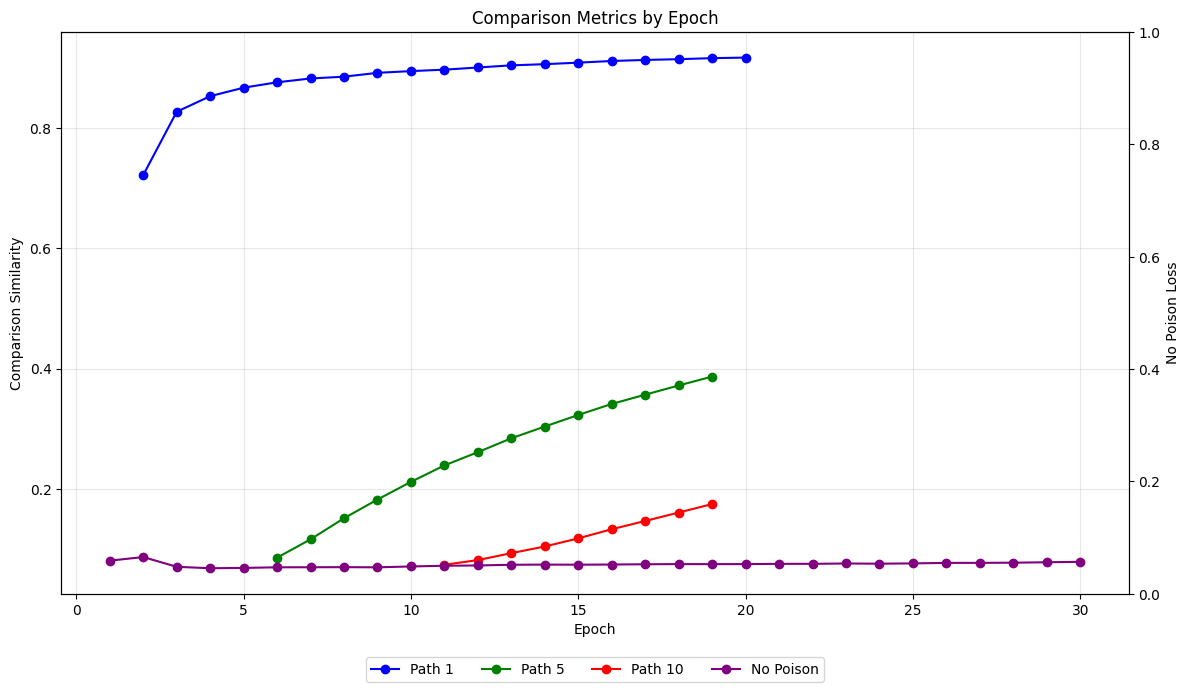

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the paths
path_1 = "../../data/wandb_export_2025-04-01T14_34_52.436+01_00.csv"
path_5 = "../../data/wandb_export_2025-04-01T14_34_43.478+01_00.csv"
path_10 = "../../data/wandb_export_2025-04-01T14_34_32.802+01_00.csv"
path_15 = "../../data/wandb_export_2025-04-01T14_34_23.168+01_00.csv"
no_poison = "../../data/wandb_export_2025-04-01T02_16_51.355+01_00.csv"

# List of paths with their labels and column information
path_data = [
    (path_1, "Path 1", "comparison_sim_avg_epoch", "MNIST_LeNet_full - comparison_sim_avg"),
    (path_5, "Path 5", "comparison_sim_avg_epoch", "MNIST_LeNet_full - comparison_sim_avg"),
    (path_10, "Path 10", "comparison_sim_avg_epoch", "MNIST_LeNet_full - comparison_sim_avg"),
    (no_poison, "No Poison", "no_poison_loss_avg_epoch", "MNIST_LeNet_train_wo_poison - no_poison_loss_avg")
]

# Set up the figure with two y-axes
fig, ax1 = plt.figure(figsize=(12, 7)), plt.gca()
ax2 = ax1.twinx()  # Create a second y-axis

# Colors for different datasets
colors = ['blue', 'green', 'red', 'purple']

# Process each CSV file
for i, (path, label, x_col, y_col) in enumerate(path_data):
    # Check if file exists
    if not os.path.exists(path):
        print(f"Warning: File {path} does not exist. Skipping.")
        continue
    
    try:
        # Read the CSV file
        df = pd.read_csv(path)
        
        # Check if required columns exist
        if not (x_col in df.columns and y_col in df.columns):
            print(f"Warning: File {path} doesn't have the required columns. Available columns: {df.columns.tolist()}")
            continue
        
        # Select the correct axis based on the dataset
        ax = ax2 if "no_poison" in path else ax1
        
        # Plot the data
        ax.plot(
            df[x_col], 
            df[y_col],
            marker='o',
            linestyle='-',
            label=label,
            color=colors[i]
        )
    except Exception as e:
        print(f"Error processing {path}: {str(e)}")

# Add labels and title
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Comparison Similarity")
ax2.set_ylabel("No Poison Loss")
plt.title("Comparison Metrics by Epoch")

# Add grid
ax1.grid(True, alpha=0.3)

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig("comparison_metrics.png", dpi=300)